In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

100%|██████████| 9.94G/9.94G [01:27<00:00, 122MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input

In [15]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices)>0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print("GPU is used")
else:
  print("GPU is not used")

GPU is used


In [16]:
train_dir='/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir='/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir='/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [17]:
# classes
classes=[]
num_classes=[]
classes.append(os.listdir(train_dir))
num_classes.append(len(classes[0]))
classe=classes[0]
classes.append(os.listdir(val_dir))
num_classes.append(len(classes[1]))

classes.append(os.listdir(test_dir))
num_classes.append(len(classes[2]))

# display all classes and there length
for i in range(3):
  print("classes -"+str(classes[i]))
  print("Number of classes" + str(num_classes[i]))

classes -['nofire', 'fire']
Number of classes2
classes -['nofire', 'fire']
Number of classes2
classes -['nofire', 'fire']
Number of classes2


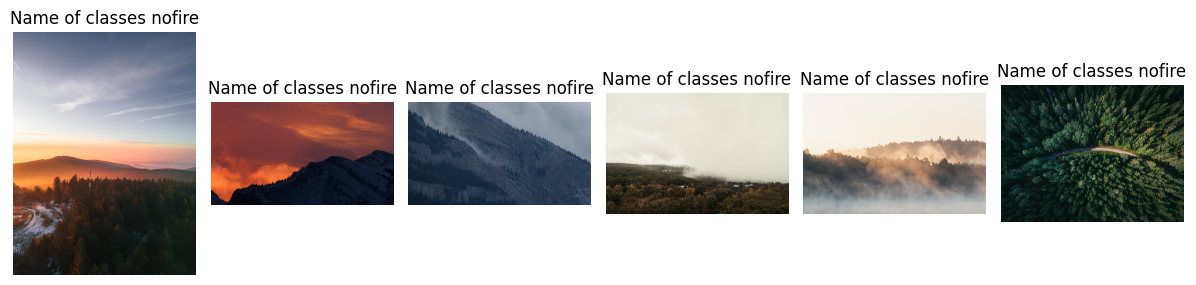

In [18]:
plt.figure(figsize=(12,10))
for i in range(6):
  class_path=os.path.join(train_dir,classe[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)

  plt.subplot(1,6,i+1)
  plt.imshow(img)
  plt.title(f"Name of classes {classe[0]}")
  plt.axis('off')
plt.tight_layout()
plt.show()


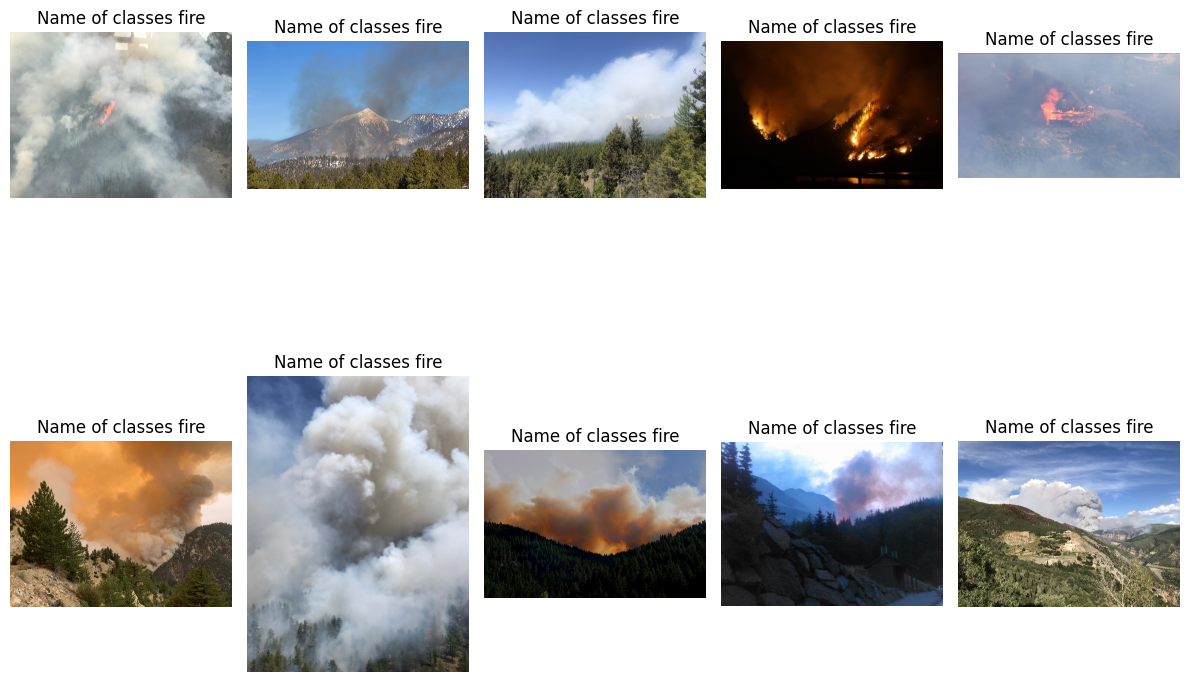

In [19]:
plt.figure(figsize=(12,10))
for i in range(10):
  class_path=os.path.join(train_dir,classe[1])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)

  plt.subplot(2,5,i+1)
  plt.imshow(img)
  plt.title(f"Name of classes {classe[1]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
img_width,img_height=150,150
batch_size=32

# data generation
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [21]:
# map the indices
class_mapping=train_generator.class_indices
# extrat class name
class_names=list(class_mapping.keys())
print(class_names
)

['fire', 'nofire']


In [26]:
# building cnn model
model=Sequential([
  Input(shape=(img_width,img_height,3)),
  Conv2D(32,(3,3),activation='relu'),
  MaxPool2D(pool_size=(2,2)),

  Conv2D(64,(3,3),activation='relu'),
  MaxPool2D(pool_size=(2,2)),

 Conv2D(128,(3,3),activation='relu'),
  MaxPool2D(pool_size=(2,2)),

  Flatten(),
  Dense(512,activation='relu'),
  Dropout(0.5),
  Dense(1,activation='sigmoid')

]
)

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)